In [2]:
import pandas as pd 

In [157]:
software_technique_table = pd.read_excel("./enterprise-attack-v9.0-software.xlsx", "techniques used")
software_technique_table.drop(columns=["source type", "mapping type", "mapping description", "target type"])
#software_list = pd.read_excel("./Data collection MITRE ATT&CK.xlsx", sheet_name = 'Software', usecols= ['ID'])
#technique_list = pd.read_excel("./Data collection MITRE ATT&CK.xlsx", sheet_name = 'Techniques', usecols= ['ID'])
#software_technique_table

,source ID,source name,target ID,target name,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,S0066,3PARA RAT,T1083,File and Directory Discovery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S0066,3PARA RAT,T1573.001,Symmetric Cryptography,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,S0066,3PARA RAT,T1070.006,Timestomp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S0066,3PARA RAT,T1071.001,Web Protocols,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,S0065,4H RAT,T1083,File and Directory Discovery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5709,S0350,zwShell,T1082,System Information Discovery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5710,S0350,zwShell,T1016,System Network Configuration Discovery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5711,S0350,zwShell,T1033,System Owner/User Discovery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5712,S0350,zwShell,T1059.003,Windows Command Shell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# want to plot
# - target ID (=technique ID) by appearance
# - Verteilung der Target IDs plotten
# - Anzahl Techniques pro Software plotten
# Anzahl verschiedener Techniques

# later
# Anzahl tactics pro Technique (Verteilung)
# Welche Tacics haben wieviele verschiedene Techniques
# Anzahl Software/ Techniques über die Jahre

<AxesSubplot:>

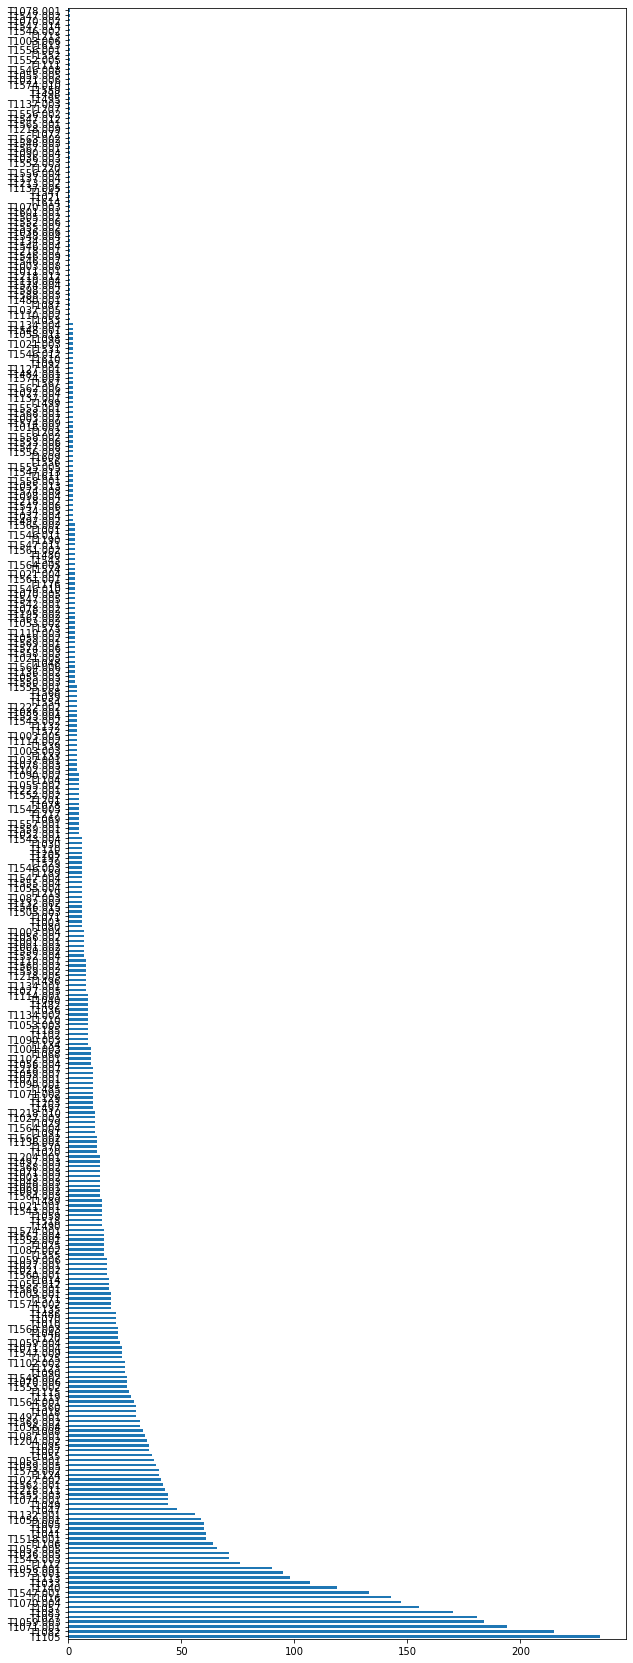

In [12]:
number_of_techniques = software_technique_table["target ID"].value_counts()
#number_of_techniques.plot(kind = 'barh')
software_technique_table["target ID"].value_counts().plot(kind='barh', figsize=(10, 30))

<AxesSubplot:>

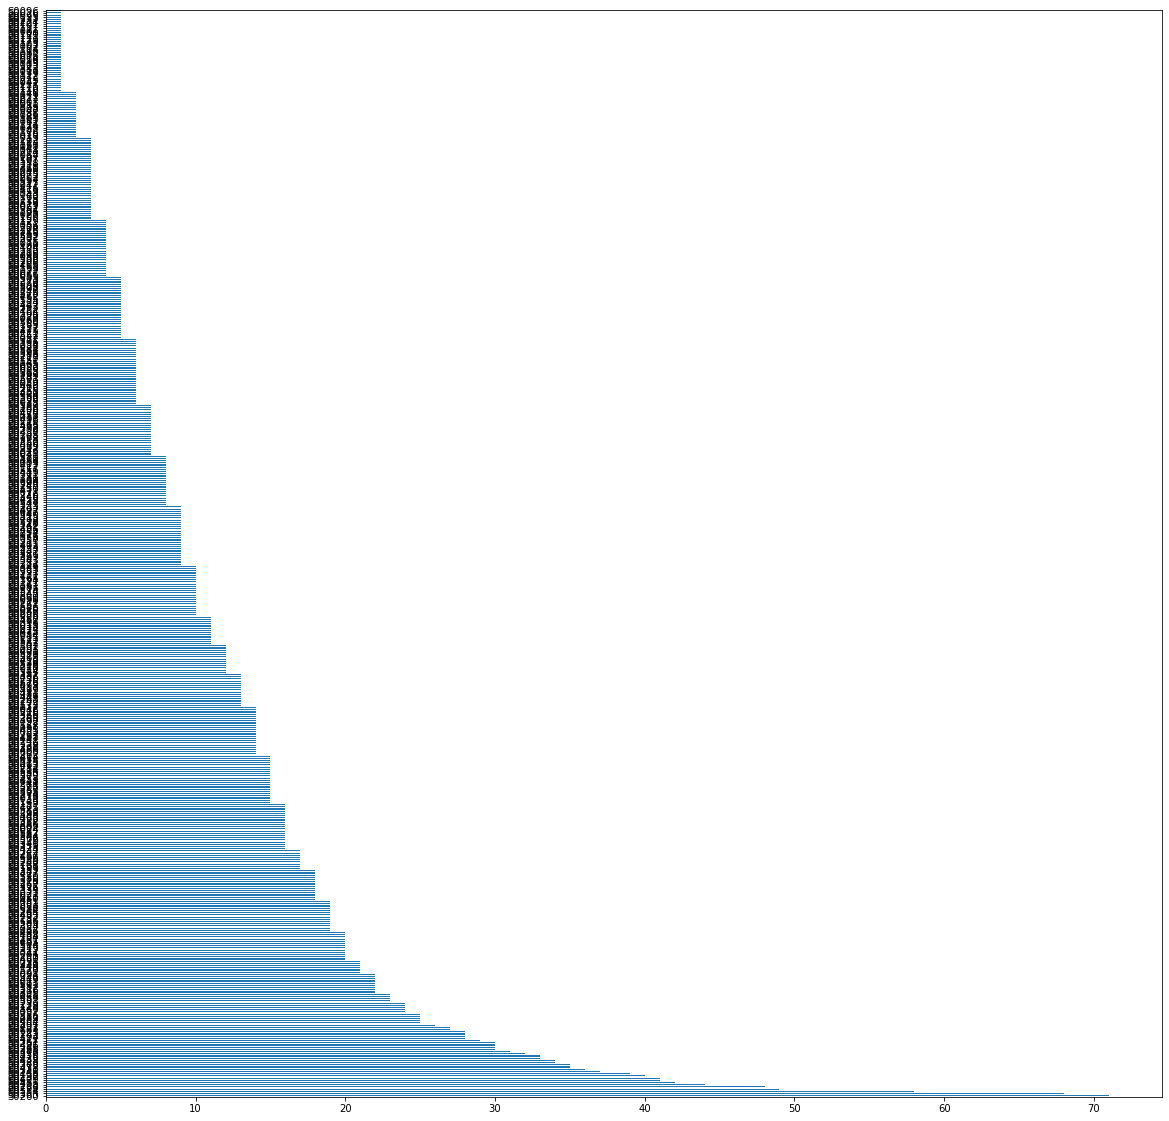

In [13]:
number_of_techniques_per_software = software_technique_table["source ID"].value_counts()
#number_of_techniques_per_software
software_technique_table["source ID"].value_counts().plot(kind='barh', figsize=(20, 20))

In [234]:
#Zeitstempel einfügen
software_table = pd.read_excel("./enterprise-attack-v9.0-software.xlsx", "software", usecols = ['ID', 'created'])
software_table = software_table.set_index('ID')
software_created = pd.read_excel("./enterprise-attack-v9.0-software.xlsx", "software")


technique_table = pd.read_excel("./enterprise-attack-v9.0-techniques.xlsx", "techniques")
technique_table = technique_table.drop(columns=["description", "url", "last modified", "detection", "platforms", 
                                       "data sources", "is sub-technique", "sub-technique of", "contributors", 
                                       "permissions required", "defenses bypassed", "supports remote", "name", 
                                        "version", "tactics"])
technique_table = technique_table.set_index('ID')

software_table


,created
ID,
S0066,31 May 2017
S0065,31 May 2017
S0469,10 June 2020
S0045,31 May 2017
S0073,31 May 2017
...,...
S0227,18 April 2018
S0225,18 April 2018
S0123,31 May 2017


In [27]:
# number_of_subtechniques = technique_table.loc[['is sub-technique'] == "WAHR"]

In [237]:
#Vektor an Techniques pro Software
#Tabelle mit Techniques und Software auf den Achsen und vielen Nullen und Einsen 
association = pd.read_excel("./Data collection MITRE ATT&CK.xlsx", sheet_name = 'Association_compact')
matrix = pd.read_excel("./Data collection MITRE ATT&CK.xlsx", sheet_name = 'Vektordarstellung')

matrix = matrix.set_index('ID')
dfmatrix = pd.DataFrame(matrix)
dfmatrix = dfmatrix.append(software_table['created'].transpose(), ignore_index = True)

#initialisiere die Werte in der Tabelle mit 0
dfmatrix = dfmatrix.fillna(int(0))
dfmatrix
#to-do: als Dateobjekt machen, T-Id wieder bekommen, überpfüfen ob wirklich int, Reihenfolge ändern

,S0066,S0065,S0469,S0045,S0073,S0552,S0331,S0092,S0504,S0584,...,S0385,S0067,S0006,S0103,S0111,S0227,S0225,S0123,S0248,S0350
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
549,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [204]:
software = association['source ID']
techniques = association['target ID']

#Es werden Software-Technique-Tupel erstellt und in data gespeichert
data = []
for i in range (len(software)):
    tuple = [(software)[i], (techniques)[i]]
    data.append(tuple)

#Schleife durch die Tupel und dabei werden an der entschrechenden Matrix Einsen eingetragen
for i in data:
    dfmatrix[i[0]][i[1]] = int(1)  


#dfmatrix = dfmatrix.insert(0, column = 'created', value = technique_table['created'])
#dfmatrix

In [ ]:
software_sum = dfmatrix.sum(axis = 0).plot(kind = 'barh', figsize = (50,50))
technique_sum = dfmatrix.sum(axis = 1)

In [205]:
#Speichere Matrix als .csv
dfmatrix.to_csv('vektordarstellung.csv', sep=";")

In [29]:
technique_list = pd.read_excel("./Data collection MITRE ATT&CK.xlsx", sheet_name = 'Techniques', usecols= ['ID', 'tactics'])
technique_list = technique_list.set_index('ID')
df_list = pd.DataFrame(technique_list).sort_values('tactics')
unique_list = df_list.drop_duplicates(subset = "tactics", ignore_index = True)
split_list = df_list['tactics'].str.split(',', expand = True)
#split_list = split_list.fillna("")
unique_list.set_index('tactics')
len(split_list)

552

<AxesSubplot:ylabel='tactics'>

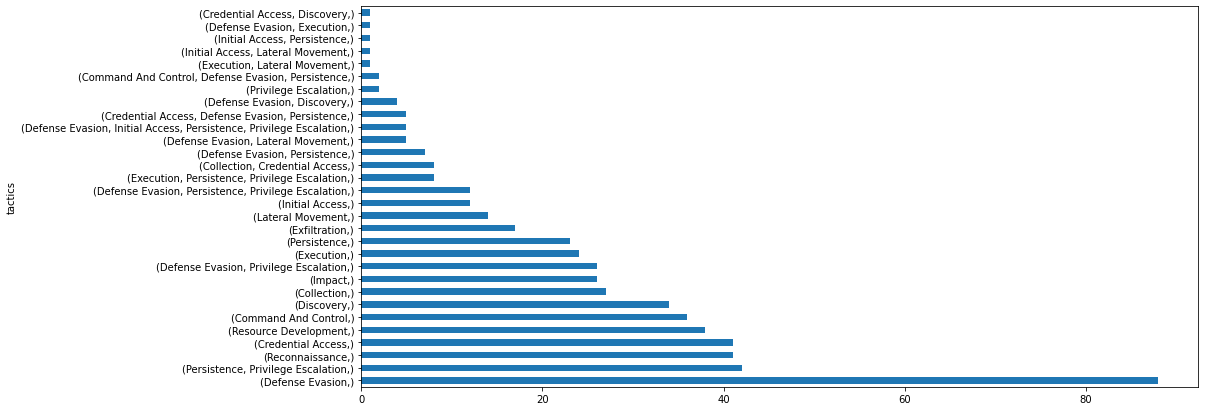

In [23]:
#wie oft kommt eine Kombination vor?
df_list.value_counts().plot(kind='barh', figsize=(15,7))


In [43]:
#wieviele Techniken können in unterschiedlichen Phasen vorkommen

split_list.to_csv('split_list.csv', sep = ";")
fourtimes = split_list[3].value_counts().sum() 
threetimes = split_list[2].value_counts().sum() - fourtimes 
twotimes = split_list[1].value_counts().sum() - threetimes - fourtimes
onetime = split_list[0].value_counts().sum() - twotimes - threetimes - fourtimes

onetime, twotimes, threetimes, fourtimes


(423, 97, 27, 5)

<AxesSubplot:ylabel='ID'>

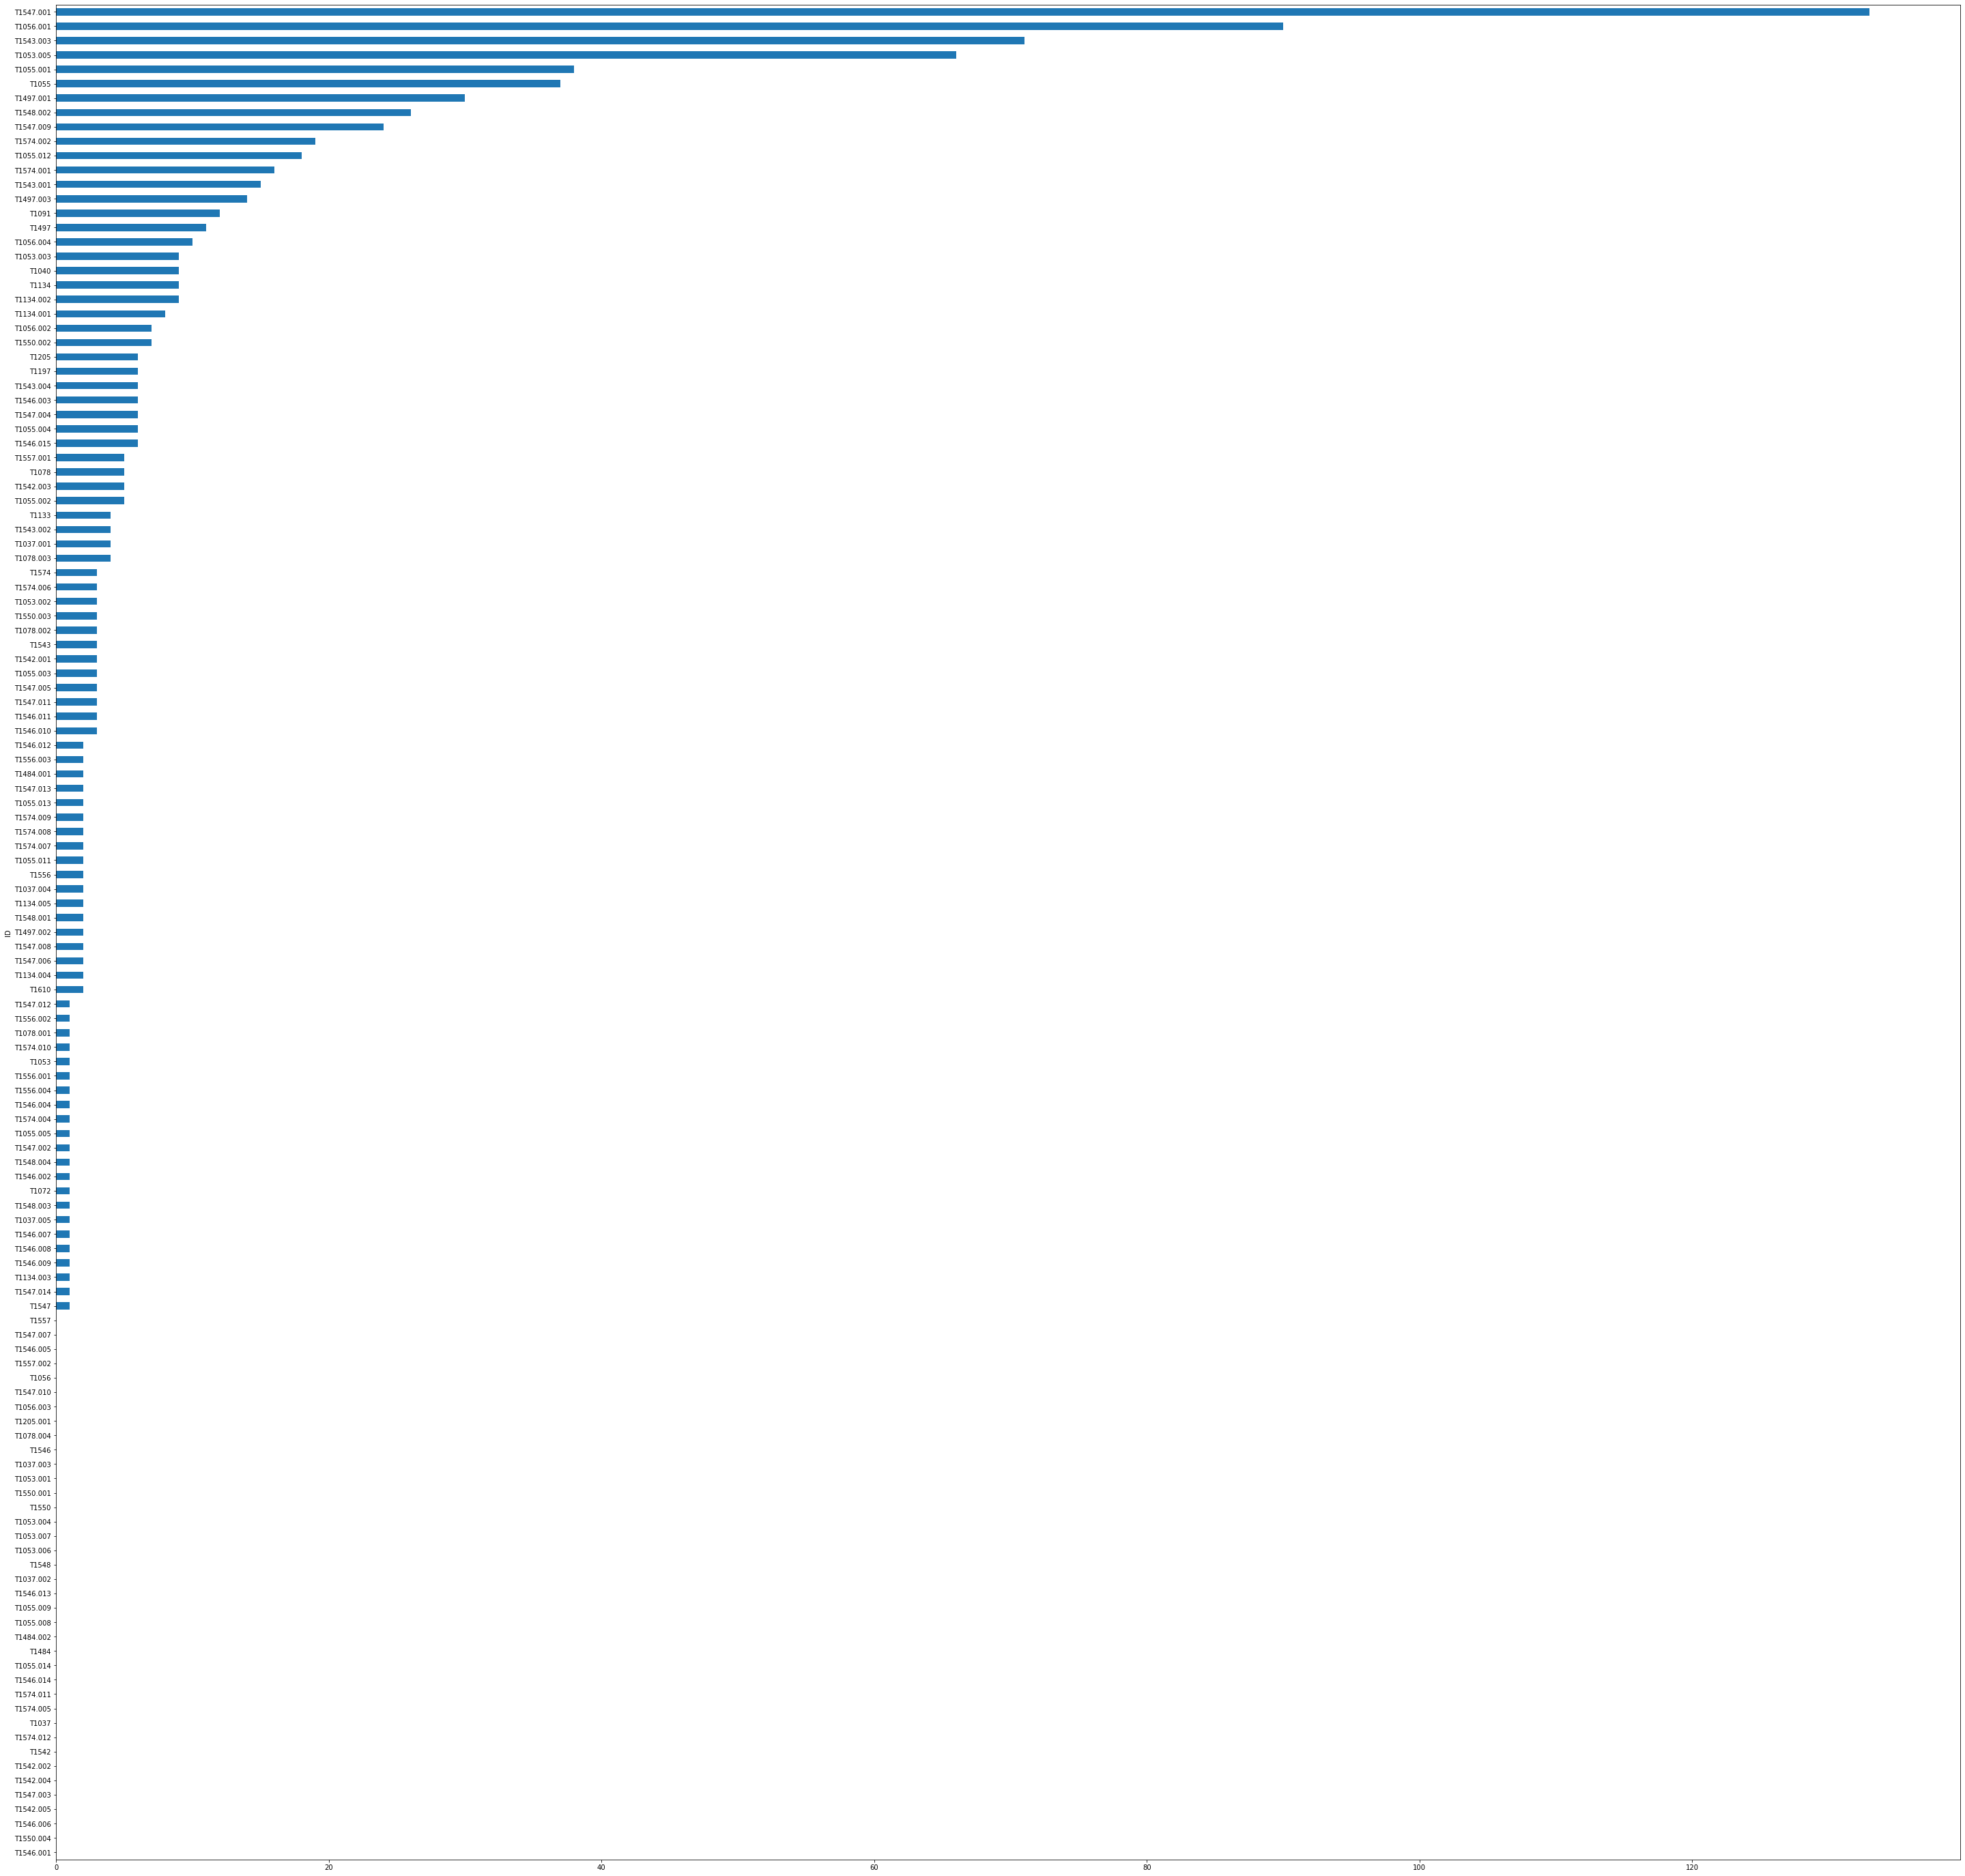

In [146]:
#möchte hier die Techniken bekommen, die in mehr als einer Phase vorkommen und herausfinden,
#wie oft diese in Softwaren vorkommen
moretimes = split_list[1].dropna()
moretimes_sum = technique_sum[moretimes.index]
moretimes_sum.sort_values().plot(kind = 'barh', figsize = (50,50))


,ID,name,description,url,created,last modified,version,tactics,detection,platforms,data sources,is sub-technique,sub-technique of,contributors,permissions required,defenses bypassed,supports remote
0,T1548,Abuse Elevation Control Mechanism,Adversaries may circumvent mechanisms designed...,https://attack.mitre.org/techniques/T1548,30 January 2020,22 July 2020,1.0,"Defense Evasion, Privilege Escalation",Monitor the file system for files that have th...,"Linux, Windows, macOS","Command: Command Execution, File: File Metadat...",False,NaN,NaN,"Administrator, User",NaN,NaN
1,T1548.002,Abuse Elevation Control Mechanism: Bypass User...,Adversaries may bypass UAC mechanisms to eleva...,https://attack.mitre.org/techniques/T1548/002,30 January 2020,22 July 2020,2.0,"Defense Evasion, Privilege Escalation",There are many ways to perform UAC bypasses wh...,Windows,"Command: Command Execution, Process: Process C...",True,T1548,Casey Smith; Stefan Kanthak,"Administrator, User",Windows User Account Control,NaN
2,T1548.004,Abuse Elevation Control Mechanism: Elevated Ex...,Adversaries may leverage the <code>Authorizati...,https://attack.mitre.org/techniques/T1548/004,30 January 2020,27 March 2020,1.0,"Defense Evasion, Privilege Escalation",Consider monitoring for <code>/usr/libexec/sec...,macOS,"Process: OS API Execution, Process: Process Cr...",True,T1548,"Erika Noerenberg, @gutterchurl, Carbon Black; ...","Administrator, User",NaN,NaN
3,T1548.001,Abuse Elevation Control Mechanism: Setuid and ...,An adversary may perform shell escapes or expl...,https://attack.mitre.org/techniques/T1548/001,30 January 2020,27 March 2020,1.0,"Defense Evasion, Privilege Escalation",Monitor the file system for files that have th...,"Linux, macOS","Command: Command Execution, File: File Metadat...",True,T1548,NaN,User,NaN,NaN
4,T1548.003,Abuse Elevation Control Mechanism: Sudo and Su...,Adversaries may perform sudo caching and/or us...,https://attack.mitre.org/techniques/T1548/003,30 January 2020,27 March 2020,1.0,"Defense Evasion, Privilege Escalation","On Linux, auditd can alert every time a user's...","Linux, macOS","Command: Command Execution, File: File Modific...",True,T1548,NaN,User,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,T1102.002,Web Service: Bidirectional Communication,"Adversaries may use an existing, legitimate ex...",https://attack.mitre.org/techniques/T1102/002,14 March 2020,26 March 2020,1.0,Command And Control,Host data that can relate unknown or suspiciou...,"Linux, Windows, macOS","Network Traffic: Network Connection Creation, ...",True,T1102,NaN,NaN,NaN,NaN
548,T1102.001,Web Service: Dead Drop Resolver,"Adversaries may use an existing, legitimate ex...",https://attack.mitre.org/techniques/T1102/001,14 March 2020,26 March 2020,1.0,Command And Control,Host data that can relate unknown or suspiciou...,"Linux, Windows, macOS","Network Traffic: Network Traffic Content, Netw...",True,T1102,NaN,NaN,NaN,NaN
549,T1102.003,Web Service: One-Way Communication,"Adversaries may use an existing, legitimate ex...",https://attack.mitre.org/techniques/T1102/003,14 March 2020,26 March 2020,1.0,Command And Control,Host data that can relate unknown or suspiciou...,"Linux, Windows, macOS","Network Traffic: Network Connection Creation, ...",True,T1102,NaN,NaN,NaN,NaN
550,T1047,Windows Management Instrumentation,Adversaries may abuse Windows Management Instr...,https://attack.mitre.org/techniques/T1047,31 May 2017,13 May 2020,1.1,Execution,Monitor network traffic for WMI connections; t...,Windows,"Command: Command Execution, Network Traffic: N...",False,NaN,NaN,NaN,NaN,1.0
